In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import plotly.graph_objects as go
import plotly.express as px
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
sns.set()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
raw_data = pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv')
raw_data.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [3]:
raw_data.shape

(79023, 76)

- 79023 oberservations, 76 features

In [4]:
df = raw_data.copy()

# Handle any missing values

<Axes: >

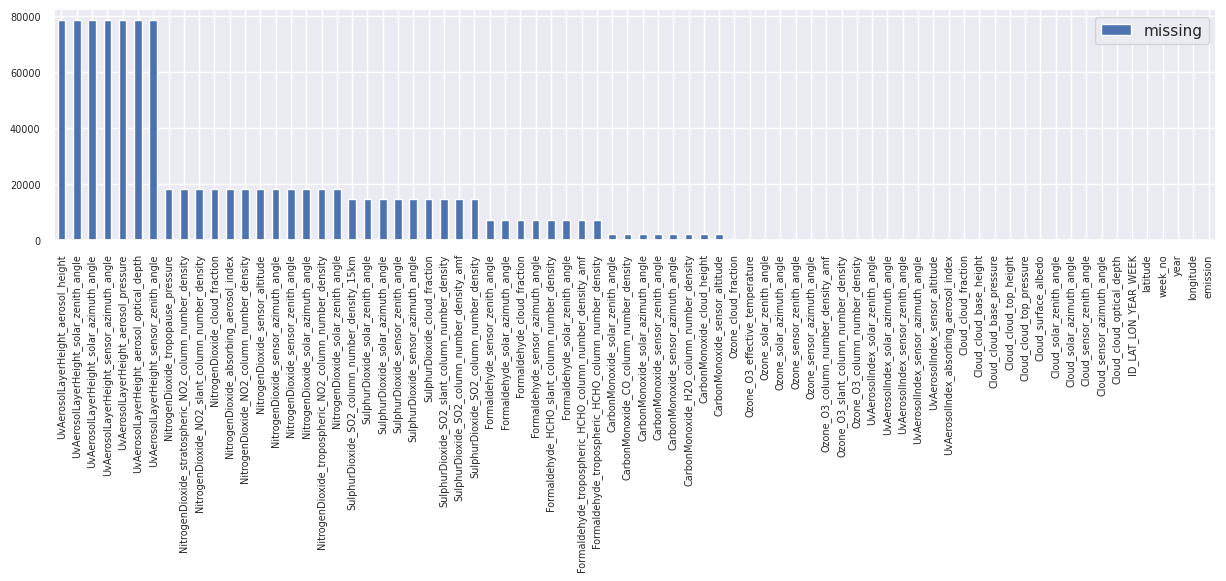

In [5]:
df_missing_values = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False),columns=['missing'])
df_missing_values.plot.bar(figsize=(15,3),fontsize=7)

Drop all columns where most of the data is missing.

In [6]:
columns_to_drop = df_missing_values.query("missing > 20000").index
df = df.drop(columns_to_drop,axis=1)
df.shape

(79023, 69)

In [7]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

In [8]:
imputation = imputer.fit_transform(df.drop('ID_LAT_LON_YEAR_WEEK',axis=1))

In [9]:
df2 = pd.DataFrame(data=imputation,columns=df.drop('ID_LAT_LON_YEAR_WEEK',axis=1).columns)
df2['ID_LAT_LON_YEAR_WEEK'] = df['ID_LAT_LON_YEAR_WEEK']
df2['year'] = df2['year'].astype('int32')
df2['week_no'] = df2['week_no'].astype('int32')
df2.head(10)

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,ID_LAT_LON_YEAR_WEEK
0,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,ID_-0.510_29.290_2019_00
1,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,ID_-0.510_29.290_2019_01
2,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,ID_-0.510_29.290_2019_02
3,-0.51,29.29,2019,3,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,ID_-0.510_29.290_2019_03
4,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,ID_-0.510_29.290_2019_04
5,-0.51,29.29,2019,5,0.000294,0.871713,0.000242,0.227656,-13.453690,57.097124,...,49846.001010,4495.301362,7.556143,0.250228,30.128401,37.007020,-137.388719,21.157820,4.310819,ID_-0.510_29.290_2019_05
6,-0.51,29.29,2019,6,-0.000285,0.791956,-0.000226,0.119397,72.198647,58.496368,...,58804.276563,3537.050659,10.493107,0.240828,4.585368,30.491541,-128.196338,21.721202,4.269334,ID_-0.510_29.290_2019_06
7,-0.51,29.29,2019,7,-0.000016,0.976311,-0.000016,0.106799,-100.956055,23.739841,...,63697.007267,2597.071563,20.533600,0.250168,16.374829,35.840248,-122.250699,20.432005,4.251361,ID_-0.510_29.290_2019_07
8,-0.51,29.29,2019,8,-0.000115,0.796941,-0.000101,0.164971,-40.179074,31.161560,...,67222.556159,2530.851476,24.253928,0.260543,-12.021751,42.688789,-114.296369,22.365602,4.281937,ID_-0.510_29.290_2019_08
9,-0.51,29.29,2019,9,0.000056,0.998541,0.000014,0.157726,-100.108744,33.592015,...,60298.717969,3510.293652,13.813379,0.289295,-66.258392,28.596211,-105.687177,21.084021,4.352933,ID_-0.510_29.290_2019_09


# EDA

### Distribution of data

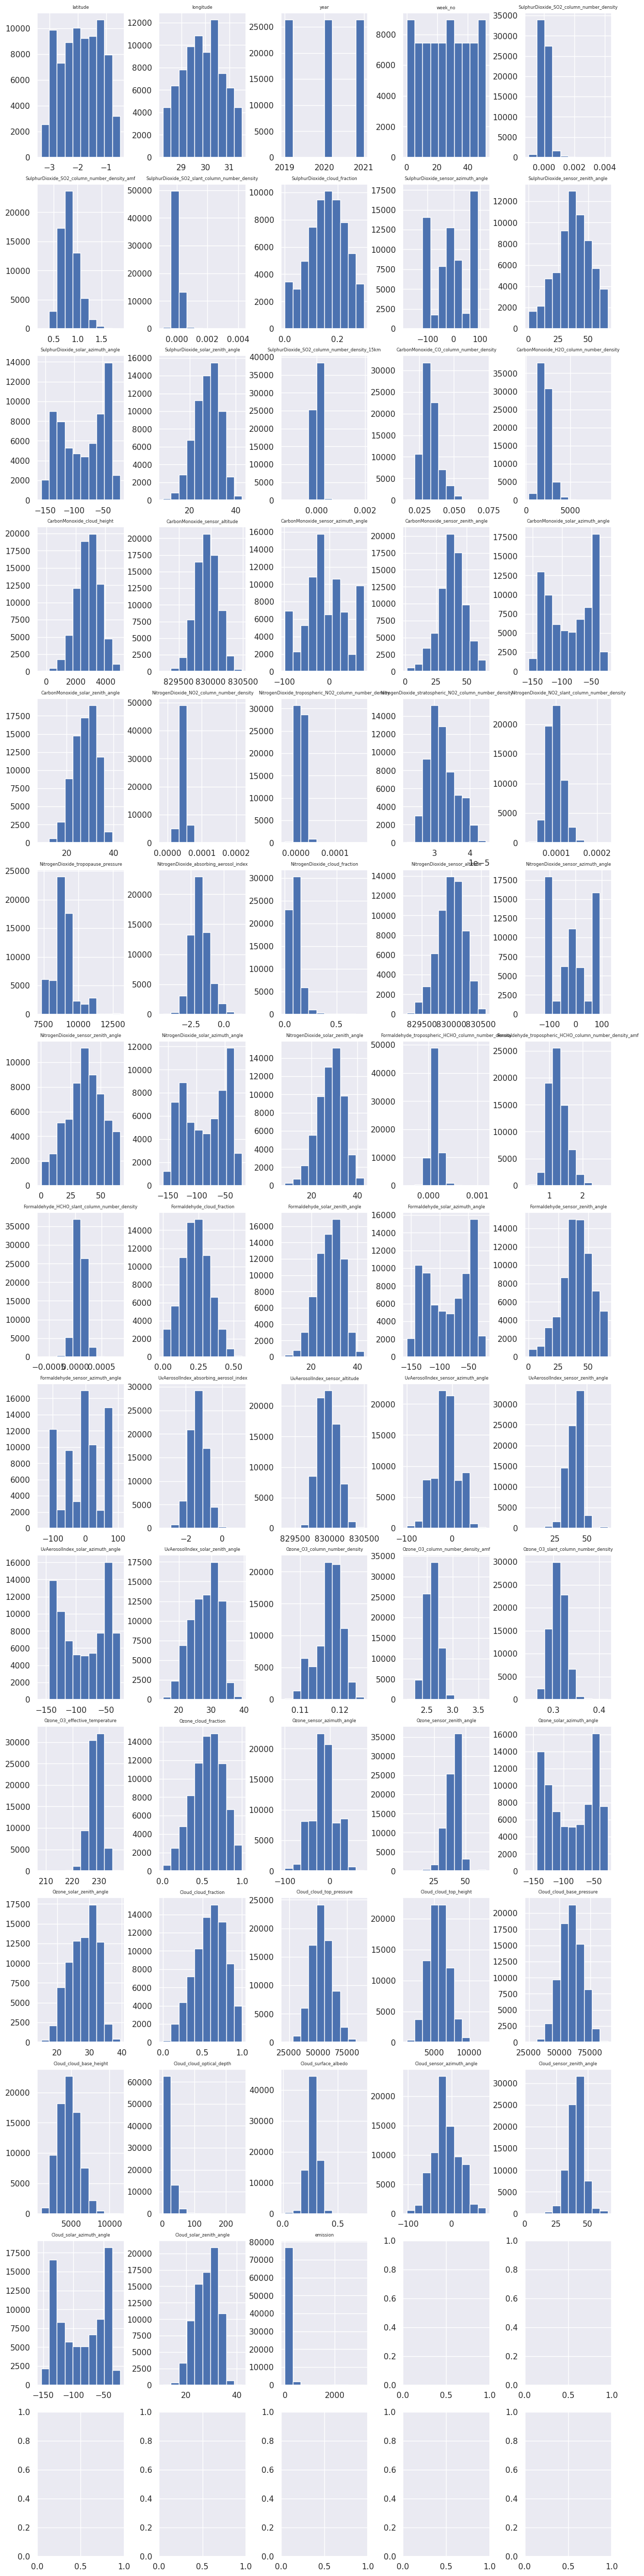

In [10]:
fig, axs = plt.subplots(15,5,figsize=(12,50))
fig.subplots_adjust(hspace=0.5)
fig.tight_layout()

axs = axs.flatten()

for i, column in enumerate(df.describe().columns):
    axs[i].hist(df[column])
    axs[i].set_title(column,size=6)

In [11]:
df2['year_week'] = pd.to_datetime(df2['year'].astype(str) + df['week_no'].astype(str) + '0', format='%G%V%w')
df2['LAT_LON'] = df2['latitude'].astype('string') + '_' + df2['longitude'].astype('string')

In [12]:
df2_loc_mean = df2.groupby('LAT_LON').agg('mean').sort_values('emission',ascending=False)
df2_loc_sum = df2.groupby('LAT_LON').agg('sum').sort_values('emission',ascending=False)

<Axes: ylabel='emission'>

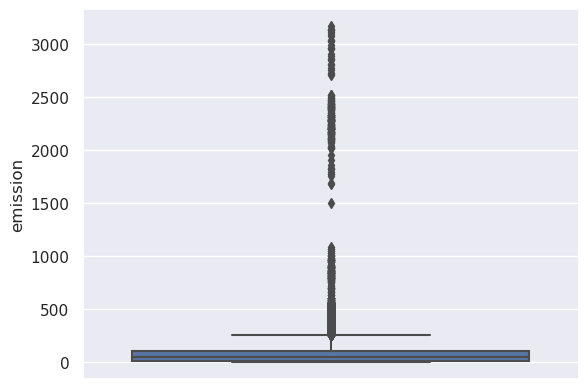

In [13]:
# simple boxplot with target to find outliers
sns.boxplot(df2, y='emission')

Again we can see that there are some pretty significant outliers. Consider:
* Dropping outliers alltogether
* Replacing outliers with mean
* Keep them if we find that they are part of the natural pattern

### Average emissions by location

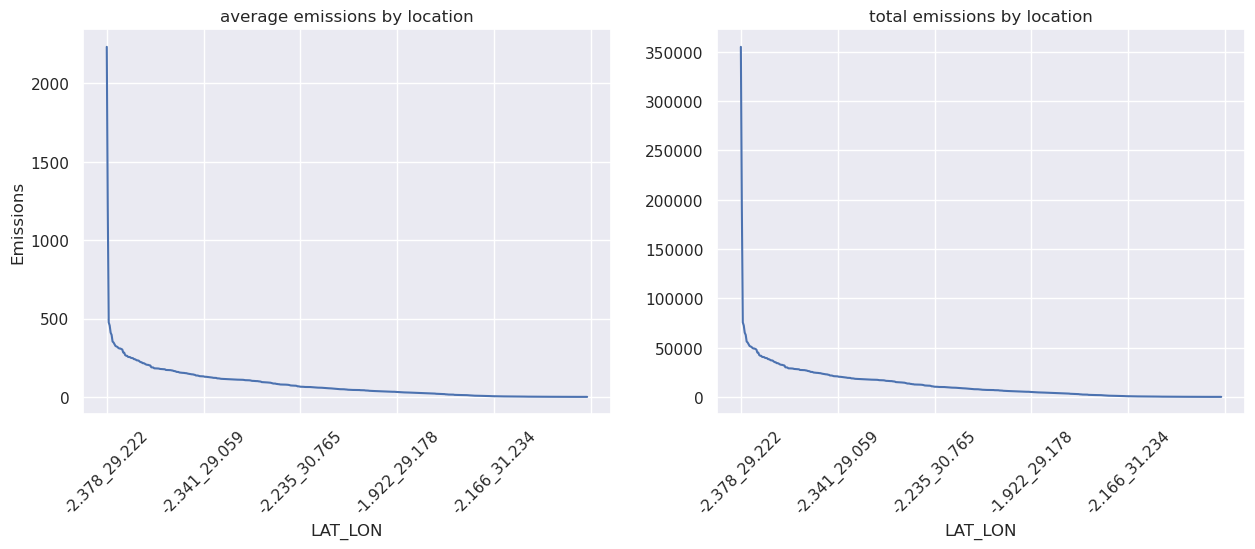

In [14]:
# create subplots structure
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# assign plots to subplots
df2_loc_mean.emission.plot.line(ax=ax1)
df2_loc_sum.emission.plot.line(ax=ax2)

# style subplots for readability
ax1.tick_params(axis='x', labelrotation = 45)
ax2.tick_params(axis='x', labelrotation = 45)
ax1.set_title('average emissions by location')
ax2.set_title('total emissions by location')
ax1.set_ylabel('Emissions')

plt.show()

We can see that the vast majority of emissions come from a small number of location. Let's visualize where they are:

### Emissions on the map

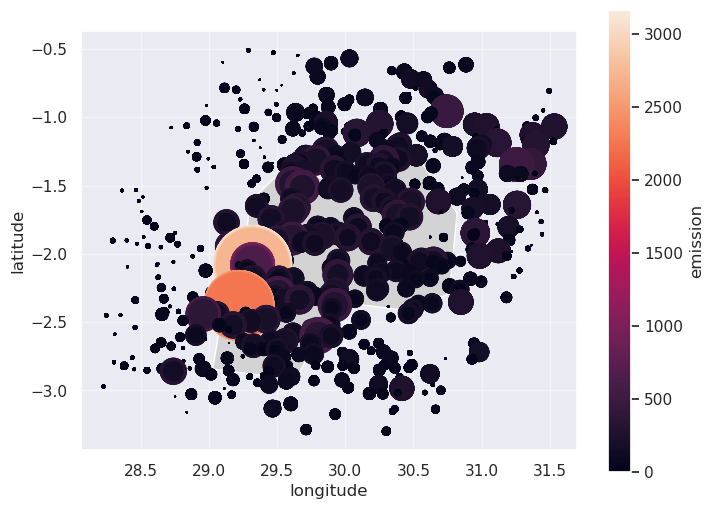

In [15]:
# create subplots
fig, ax = plt.subplots(figsize=(8,6))

# get country from geopandas
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Rwanda"].plot(color="lightgrey",ax=ax)

# plot data on top
df2.plot.scatter(x="longitude",
                 y="latitude",
                 s='emission',
                 c='emission',
                 ax=ax)
ax.grid(alpha=0.5)
plt.show()

In [16]:
# Show emissions on a better map for better visual representation

fig = go.Figure(go.Densitymapbox(lat=df2['latitude'],
                                 lon=df2['longitude'],
                                 z= df2['emission'], 
                                 radius=5, 
                                 colorscale ='bluered'))

fig.update_layout(mapbox_style="carto-positron",
                  mapbox_center_lon=30.34,
                  mapbox_center_lat=-2.01,
                  mapbox_zoom=6)

fig.show()

### Emissions over time

<Axes: xlabel='year_week', ylabel='emission'>

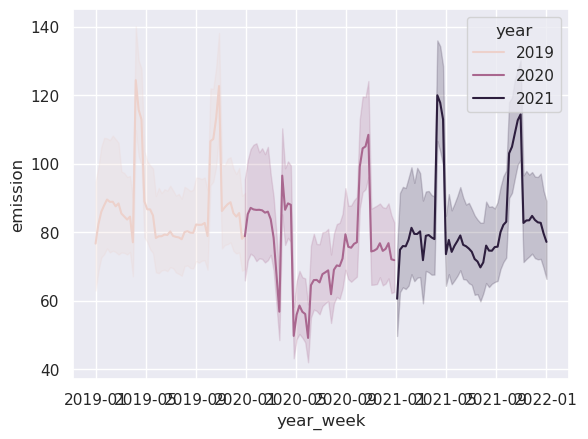

In [17]:
# Understand how average emissions fluctuate over the time period
sns.lineplot(data=df2, x='year_week', y='emission', hue='year')

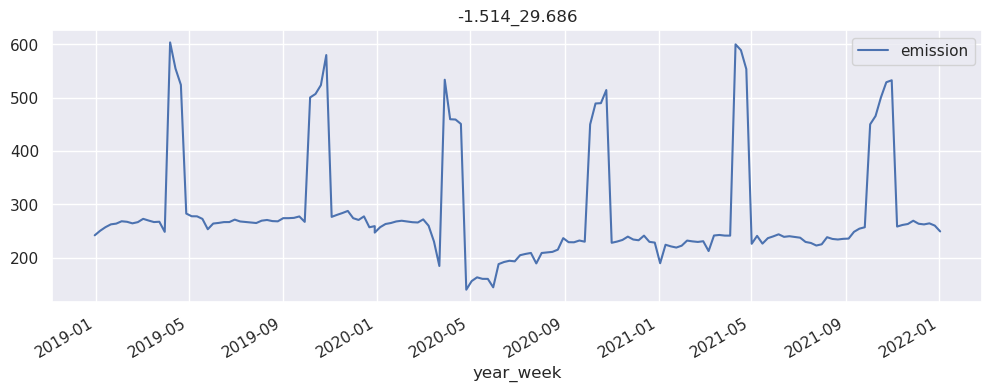

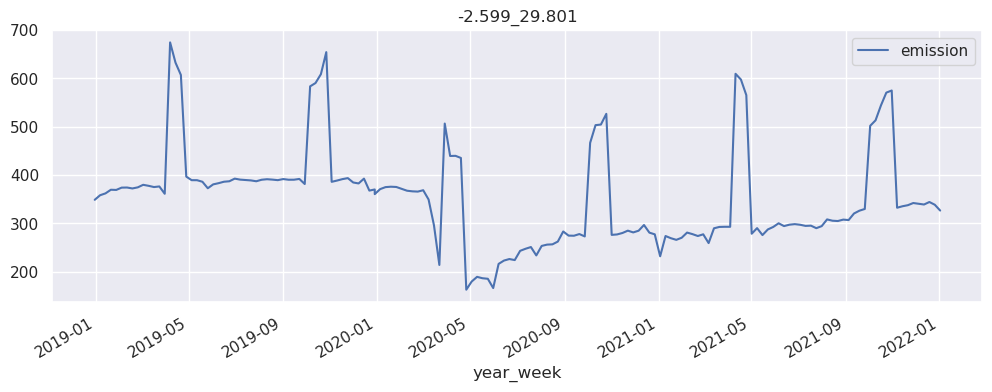

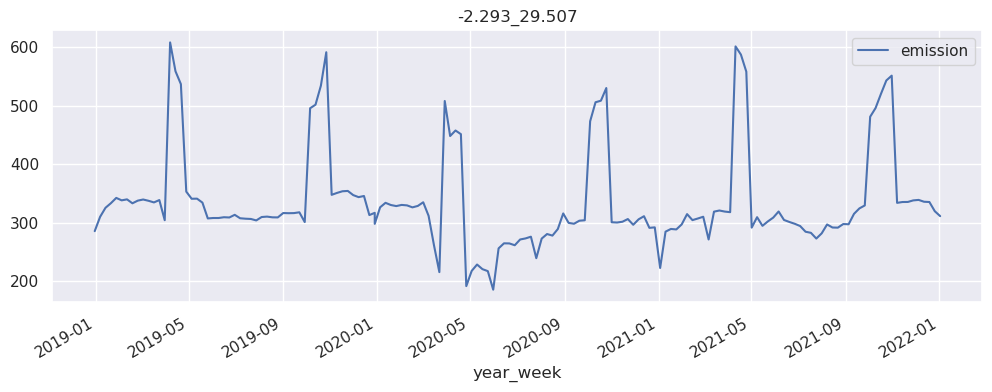

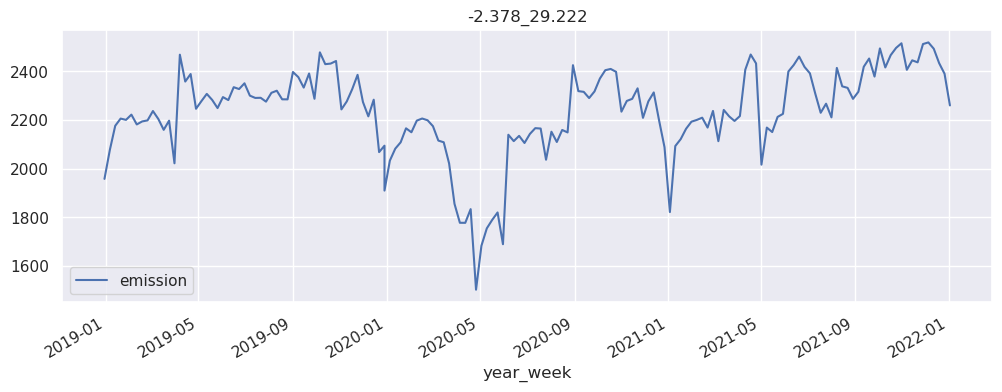

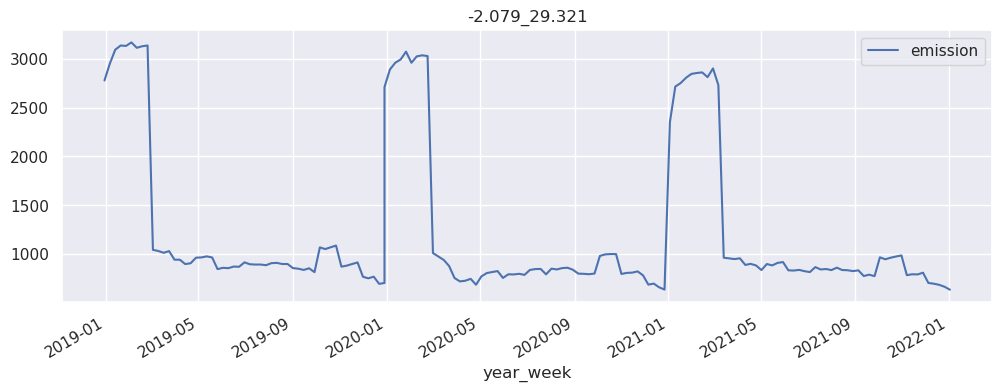

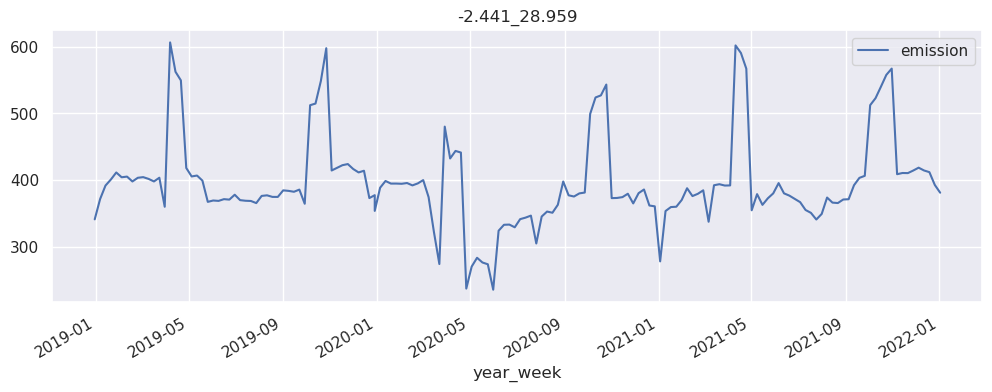

In [18]:
# Generate unique locations where emissions are unusually high
locations_above_600 = set(df2.query("emission > 600")['LAT_LON'])

# Look at the outlier locations in isolation
for location in locations_above_600:
    df2.query("LAT_LON == @location").plot.line(x='year_week', y='emission',title=location, figsize=(12,4))
    plt.show()

# Feature selection

In [19]:
# Drop non-numerical features
df3 = df2.drop(['ID_LAT_LON_YEAR_WEEK','emission','year_week'],axis=1)

<Axes: >

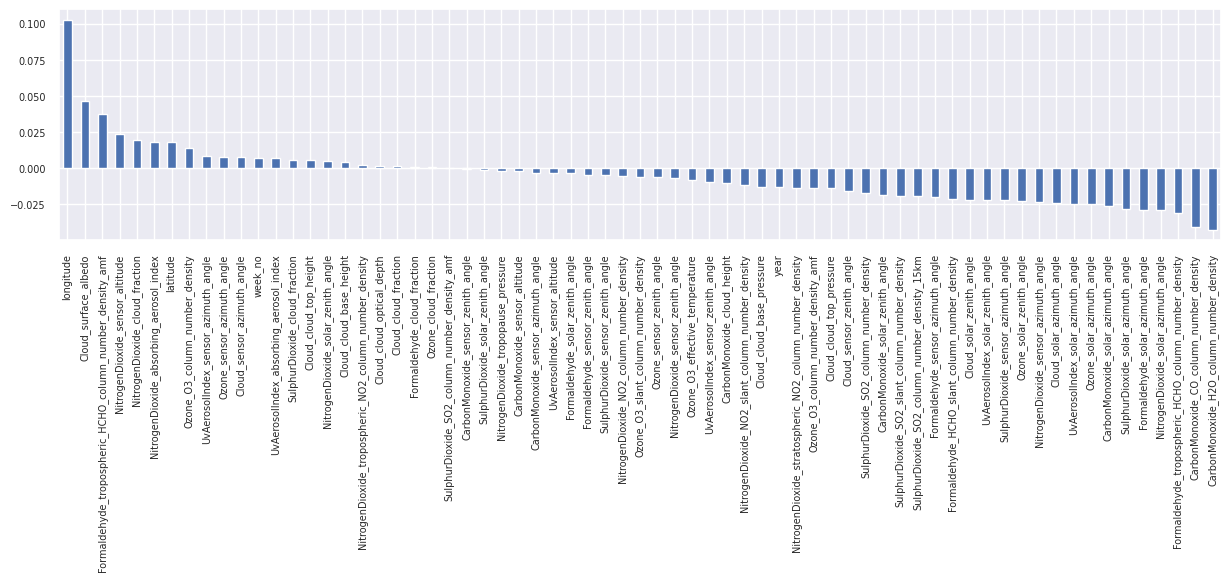

In [20]:
# Look at correlation of variables
corrs = df3.corrwith(df2['emission']).sort_values(ascending=False)
corrs.plot.bar(figsize=(15,3),fontsize=7)

In [21]:
# Top correlated features
corrs.head()

longitude                                                   0.102746
Cloud_surface_albedo                                        0.046530
Formaldehyde_tropospheric_HCHO_column_number_density_amf    0.037577
NitrogenDioxide_sensor_altitude                             0.023791
NitrogenDioxide_cloud_fraction                              0.019400
dtype: float64

# Modeling

### Without outliers
Since the large outliers are confined to a few locations, removing them will create a more balanced dataset.

In [22]:
threshold = df2.emission.quantile(0.995)
df_no_outliers = df2.drop(['LAT_LON','year_week','ID_LAT_LON_YEAR_WEEK'],axis=1).query("emission < @threshold")

In [23]:
X = df_no_outliers.drop('emission',axis=1)
y = df_no_outliers['emission']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=12)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55038, 67)
(23589, 67)
(55038,)
(23589,)


In [25]:
def fit_estimator(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    score = model.score(X_test, y_test)
    print(model)
    print(f"> Root-mean-squared-error: {rmse}")
    print(f"> Score: {score}")

In [26]:
tree = DecisionTreeRegressor()
fit_estimator(tree, X_train, y_train, X_test, y_test)

DecisionTreeRegressor()
> Root-mean-squared-error: 26.769509218703153
> Score: 0.900887137597107


In [27]:
forest = RandomForestRegressor()
fit_estimator(forest, X_train, y_train, X_test, y_test)

RandomForestRegressor()
> Root-mean-squared-error: 19.173737874934094
> Score: 0.9491532999680826


In [28]:
pd.DataFrame(data=forest.feature_importances_,index=X.columns,columns=['importance %']).sort_values(by='importance %',ascending=False)

,importance %
longitude,0.467055
latitude,0.441290
Ozone_O3_column_number_density,0.008526
week_no,0.008264
Cloud_surface_albedo,0.006778
...,...
NitrogenDioxide_solar_zenith_angle,0.000539
SulphurDioxide_SO2_column_number_density,0.000537
Ozone_O3_column_number_density_amf,0.000483
UvAerosolIndex_sensor_zenith_angle,0.000403


### With outliers

In [29]:
df_with_outliers = df2.drop(['LAT_LON','year_week','ID_LAT_LON_YEAR_WEEK'],axis=1)
X_out = df_with_outliers.drop('emission',axis=1)
y_out = df_with_outliers['emission']

X_train, X_test, y_train, y_test = train_test_split(X_out, y_out, train_size=0.7, shuffle=True, random_state=12)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55316, 67)
(23707, 67)
(55316,)
(23707,)


In [30]:
tree2 = DecisionTreeRegressor()
fit_estimator(tree2,X_train, y_train, X_test, y_test)

DecisionTreeRegressor()
> Root-mean-squared-error: 38.81593786008784
> Score: 0.9319382374609602


In [31]:
forest2 = RandomForestRegressor()
fit_estimator(forest2, X_train, y_train, X_test, y_test)

RandomForestRegressor()
> Root-mean-squared-error: 28.29477060844429
> Score: 0.9638344246693602


### Only most important features

In [32]:
df_most = df2[['latitude','longitude','year','week_no','emission']]
X_most = df_most.drop('emission',axis=1)
y_most = df_most['emission']

X_train, X_test, y_train, y_test = train_test_split(X_most, y_most, train_size=0.7, shuffle=True, random_state=12)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55316, 4)
(23707, 4)
(55316,)
(23707,)


In [33]:
tree3 = DecisionTreeRegressor()
fit_estimator(tree3, X_train, y_train, X_test, y_test)

DecisionTreeRegressor()
> Root-mean-squared-error: 17.531507644947656
> Score: 0.9861157778305267


In [34]:
df_most_no_outliers = df2[['latitude','longitude','year','week_no','emission']].query("emission < @threshold")
X_mn = df_most_no_outliers.drop('emission',axis=1)
y_mn = df_most_no_outliers['emission']

X_train, X_test, y_train, y_test = train_test_split(X_mn, y_mn, train_size=0.7, shuffle=True, random_state=12)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55038, 4)
(23589, 4)
(55038,)
(23589,)


In [35]:
forest3 = RandomForestRegressor()
fit_estimator(forest3, X_train, y_train, X_test, y_test)

RandomForestRegressor()
> Root-mean-squared-error: 11.093416410103035
> Score: 0.9829792053855677
